# Regresion logistica con over-sampling

## Librerias

In [1]:
from auxiliares import woe,iv

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scikitplot.metrics import plot_roc_curve,plot_confusion_matrix,plot_ks_statistic

from imblearn.over_sampling import RandomOverSampler

sns.set()
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

## Lectura de datos

In [2]:
datos=pd.read_csv('~/datos_discretizados.csv',dtype='category')

In [3]:
df=datos.copy()
df['id']=df['id'].astype('int')
df['target']=df['target'].astype('int')
df.head()

,id,term,grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,addr_state,initial_list_status,mths_since_last_delinq,mths_since_last_record,mths_since_last_major_derog,loan_amnt_3,funded_amnt_3,funded_amnt_inv_3,int_rate_3,installment_3,annual_inc_3,dti_3,open_acc_3,revol_bal_3,revol_util_3,total_acc_3,tot_cur_bal_3,total_rev_hi_lim_3,mths_between_issued_earliest_cr_3,collections_12_mths_ex_med_3,acc_now_delinq_3,tot_coll_amt_3,delinq_2yrs_3,inq_last_6mths_3,pub_rec_3,loan_amnt_5,funded_amnt_5,funded_amnt_inv_5,int_rate_5,installment_5,annual_inc_5,dti_5,open_acc_5,revol_bal_5,revol_util_5,total_acc_5,tot_cur_bal_5,total_rev_hi_lim_5,mths_between_issued_earliest_cr_5,collections_12_mths_ex_med_5,acc_now_delinq_5,tot_coll_amt_5,delinq_2yrs_5,inq_last_6mths_5,pub_rec_5,loan_amnt_7,funded_amnt_7,funded_amnt_inv_7,int_rate_7,installment_7,annual_inc_7,dti_7,open_acc_7,revol_bal_7,revol_util_7,total_acc_7,tot_cur_bal_7,total_rev_hi_lim_7,mths_between_issued_earliest_cr_7,collections_12_mths_ex_med_7,acc_now_delinq_7,tot_coll_amt_7,delinq_2yrs_7,inq_last_6mths_7,pub_rec_7,loan_amnt_9,funded_amnt_9,funded_amnt_inv_9,int_rate_9,installment_9,annual_inc_9,dti_9,open_acc_9,revol_bal_9,revol_util_9,total_acc_9,tot_cur_bal_9,total_rev_hi_lim_9,mths_between_issued_earliest_cr_9,collections_12_mths_ex_med_9,acc_now_delinq_9,tot_coll_amt_9,delinq_2yrs_9,inq_last_6mths_9,pub_rec_9,target
0,1077501,36,b,10+ years,rent,verified,n,credit_card,az,f,missing,missing,missing,"(500.0, 10000.0]","(500.0, 10000.0]","(0.0, 9900.0]","(5.42, 11.99]","(15.67, 300.39]","(1896.0, 50000.0]","(20.63, 39.99]","(0.0, 9.0]","(8050.0, 16768.0]","(68.8, 892.3]","(1.0, 19.0]","(48529.0, 136668.00000000012]","(18500.0, 28100.0]","(214.0, 854.0]","(0.0, 20.0]","(0.0, 5.0]","(0.0, 9152545.0]","(0.0, 29.0]","(1.0, 33.0]","(0.0, 63.0]","(500.0, 7000.0]","(500.0, 7000.0]","(0.0, 7000.0]","(9.91, 12.49]","(15.67, 226.37]","(1896.0, 41600.0]","(24.21, 39.99]","(0.0, 7.0]","(9451.0, 14527.0]","(78.5, 892.3]","(1.0, 15.0]","(69888.6, 95390.39999999997]","(21600.0, 24200.0]","(256.0, 854.0]","(0.0, 20.0]","(0.0, 5.0]","(0.0, 9152545.0]","(0.0, 29.0]","(1.0, 2.0]","(0.0, 63.0]","(500.0, 6000.0]","(500.0, 6000.0]","(0.0, 5699.730000000003]","(8.9, 11.14]","(15.67, 189.1]","(1896.0, 37435.00000000006]","(26.19, 39.99]","(0.0, 6.0]","(10080.0, 13682.0]","(83.2, 892.3]","(1.0, 13.0]","(81539.0, 164427.0]","(22800.0, 31400.0]","(287.0, 854.0]","(0.0, 20.0]","(0.0, 5.0]","(0.0, 9152545.0]","(0.0, 1.0]","(1.0, 2.0]","(0.0, 63.0]","(5000.0, 7425.0]","(5000.0, 7375.0]","(0.0, 5000.0]","(10.16, 11.99]","(15.67, 168.45]","(1896.0, 35000.0]","(27.5, 39.99]","(0.0, 6.0]","(13230.0, 16768.0]","(76.8, 86.1]","(1.0, 12.0]","(81539.0, 136667.99999999994]","(22800.0, 28100.0]","(307.0, 854.0]","(0.0, 20.0]","(0.0, 5.0]","(0.0, 9152545.0]","(0.0, 1.0]","(1.0, 2.0]","(0.0, 1.0]",0
1,1077430,60,c,< 1 year,rent,source verified,n,other,ga,f,missing,missing,missing,"(500.0, 10000.0]","(500.0, 10000.0]","(0.0, 9900.0]","(11.99, 15.59]","(15.67, 300.39]","(1896.0, 50000.0]","(0.0, 13.27]","(0.0, 9.0]","(0.0, 8050.0]","(0.0, 46.0]","(1.0, 19.0]","(48529.0, 136668.00000000012]","(18500.0, 28100.0]","(149.0, 214.0]","(0.0, 20.0]","(0.0, 5.0]","(0.0, 9152545.0]","(0.0, 29.0]","(1.0, 33.0]","(0.0, 63.0]","(500.0, 7000.0]","(500.0, 7000.0]","(0.0, 7000.0]","(14.49, 17.57]","(15.67, 226.37]","(1896.0, 41600.0]","(0.0, 10.11]","(0.0, 7.0]","(0.0, 5442.0]","(0.0, 34.8]","(1.0, 15.0]","(69888.6, 95390.39999999997]","(21600.0, 24200.0]","(123.0, 159.0]","(0.0, 20.0]","(0.0, 5.0]","(0.0, 9152545.0]","(0.0, 29.0]","(2.0, 33.0]","(0.0, 63.0]","(500.0, 6000.0]","(500.0, 6000.0]","(0.0, 5699.730000000003]","(14.33, 15.99]","(15.67, 189.1]","(1896.0, 37435.00000000006]","(0.0, 8.47]","(0.0, 6.0]","(0.0, 4313.0]","(0.0, 28.8]","(1.0, 13.0]","(81539.0, 164427.0]","(22800.0, 31400.0]","(141.0, 164.0]","(0.0, 20.0]","(0.0, 5.0]","(0.0, 9152545.0]","(0.0, 1.0]","(2.0, 33.0]","(0.0, 63.0]","(500.0, 5000.0]","

## Partición de datos

In [4]:
train,test=train_test_split(df,test_size=.3,stratify=df['target'],random_state=11238)
train.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)
train.shape,test.shape

((326399, 94), (139886, 94))

## Transformación WoE datos de entrenamiento

In [5]:
mapa={var:woe(train,var,'target')['woe'].to_dict() for var in train.columns if var not in ['target','id']}

In [6]:
train_woe=train.replace(mapa)
train_woe.head()

,id,term,grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,addr_state,initial_list_status,mths_since_last_delinq,mths_since_last_record,mths_since_last_major_derog,loan_amnt_3,funded_amnt_3,funded_amnt_inv_3,int_rate_3,installment_3,annual_inc_3,dti_3,open_acc_3,revol_bal_3,revol_util_3,total_acc_3,tot_cur_bal_3,total_rev_hi_lim_3,mths_between_issued_earliest_cr_3,collections_12_mths_ex_med_3,acc_now_delinq_3,tot_coll_amt_3,delinq_2yrs_3,inq_last_6mths_3,pub_rec_3,loan_amnt_5,funded_amnt_5,funded_amnt_inv_5,int_rate_5,installment_5,annual_inc_5,dti_5,open_acc_5,revol_bal_5,revol_util_5,total_acc_5,tot_cur_bal_5,total_rev_hi_lim_5,mths_between_issued_earliest_cr_5,collections_12_mths_ex_med_5,acc_now_delinq_5,tot_coll_amt_5,delinq_2yrs_5,inq_last_6mths_5,pub_rec_5,loan_amnt_7,funded_amnt_7,funded_amnt_inv_7,int_rate_7,installment_7,annual_inc_7,dti_7,open_acc_7,revol_bal_7,revol_util_7,total_acc_7,tot_cur_bal_7,total_rev_hi_lim_7,mths_between_issued_earliest_cr_7,collections_12_mths_ex_med_7,acc_now_delinq_7,tot_coll_amt_7,delinq_2yrs_7,inq_last_6mths_7,pub_rec_7,loan_amnt_9,funded_amnt_9,funded_amnt_inv_9,int_rate_9,installment_9,annual_inc_9,dti_9,open_acc_9,revol_bal_9,revol_util_9,total_acc_9,tot_cur_bal_9,total_rev_hi_lim_9,mths_between_issued_earliest_cr_9,collections_12_mths_ex_med_9,acc_now_delinq_9,tot_coll_amt_9,delinq_2yrs_9,inq_last_6mths_9,pub_rec_9,target
0,1152009,0.135979,1.115631,-0.033138,0.140725,-0.171171,0.000042,-0.233508,0.152194,-0.106289,-0.011645,-0.006394,-0.018463,-0.056006,-0.053737,-0.042543,0.803143,-0.061803,0.293236,0.196538,-0.016386,-0.036191,0.203520,0.008456,-0.192910,-0.178672,0.001865,0.0,0.0,0.0,0.0,-0.185304,0.0,-0.054992,-0.048513,-0.036924,1.078620,-0.031664,0.178487,0.231366,-0.016386,-0.050581,0.256731,0.005953,-0.297194,-0.299946,0.014558,0.0,0.0,0.0,0.0,-0.339461,0.0,-0.049311,-0.040957,-0.025896,1.242684,-0.070490,0.266673,0.246837,-0.021919,-0.037141,0.273826,0.010552,-0.199436,-0.198030,0.069828,0.0,0.0,0.0,0.00139,-0.339461,0.0,-0.073158,-0.064925,-0.047680,0.837343,-0.065190,0.194505,0.211916,-0.017199,-0.005904,0.298346,0.015181,-0.246125,-0.246392,0.049775,0.0,0.0,0.0,0.00139,-0.339461,-0.011228,0
1,19937859,0.135979,0.372679,-0.017529,-0.001913,0.161334,0.000042,-0.233508,-0.031987,0.224335,0.044648,-0.006394,-0.018463,0.016993,0.016365,0.019035,0.803143,-0.061803,0.293236,0.005017,0.016547,-0.041118,-0.170669,0.079971,0.291088,-0.178672,0.001865,0.0,0.0,0.0,0.0,-0.185304,0.0,-0.031376,-0.032437,-0.028369,1.078620,-0.066174,0.360566,0.003167,0.000080,-0.017923,-0.095651,0.068868,0.097624,-0.007856,0.014558,0.0,0.0,0.0,0.0,-0.061641,0.0,-0.024787,-0.029455,-0.040559,0.631316,-0.044975,0.266673,0.091489,-0.021919,-0.025329,-0.146574,0.080478,0.211579,0.016451,0.016488,0.0,0.0,0.0,0.00139,-0.061641,0.0,-0.016774,0.005593,0.005566,0.837343,-0.137832,0.307237,0.083425,0.003816,-0.026332,-0.091262,0.064462,0.120360,0.022257,0.028111,0.0,0.0,0.0,0.00139,-0.061641,-0.011228,0
2,11964802,0.135979,1.115631,-0.033138,0.140725,0.056090,0.000042,0.257785,0.152194,-0.106289,-0.011645,-0.006394,-0.018463,0.041277,0.039362,0.024448,0.803143,0.072462,-0.016408,0.196538,-0.016386,-0.041118,0.203520,-0.087748,0.291088,0.283652,0.196091,0.0,0.0,0.0,0.0,-0.185304,0.0,0.027123,0.028710,0.008283,1.078620,0.074143,0.178487,0.231366,-0.016386,-0.050581,0.256731,-0.039948,0.408654,0.397880,0.123959,0.0,0.0,0.0,0.0,-0.339461,0.0,-0.008503,-0.028514,-0.014780,1.242684,0.041840,0.105217,0.246837,-0.006428,-0.049738,0.273826,-0.060293,0.211579,0.197892,0.183355,0.0,0.0,0.0,0.00139,-0.339461,0.0,-0.017572,-0.018194,-0.007890,0.837343,0.048488,0.099234,0.211916,-0.014273,-0.064372,0.298346,-0.026924,0.284225,0.261268,0.200574,0.0,0.0,0.0,0.00139,-0.339461,-0.011228,0
3,32329356,0.135979,0.372679,-0.071490,-0.155808,0.056090,0.000042,-0.040423,0.155442,-0.106289,-0.011645,-0.006394,-0.018463,0.016993,0.016365,0.019035,0.078985,-0.007215,-0.016408,-0.174742,0.016547,-0.036191,0.203520,0

## Selección de variables

In [7]:
varc=['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 
      'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'tot_cur_bal', 'total_rev_hi_lim', 
      'mths_between_issued_earliest_cr', 'collections_12_mths_ex_med', 'acc_now_delinq', 
      'tot_coll_amt', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec']


#sub_grade
vard=['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'pymnt_plan', 
      'purpose', 'addr_state', 'initial_list_status', 'mths_since_last_delinq',
        'mths_since_last_record', 'mths_since_last_major_derog']

um = ['id']

target=['target']

In [8]:
df_iv=pd.Series({v:iv(train_woe,v,'target') for v in train_woe.columns if v not in ['target','id']}).reset_index()\
        .rename(columns={'index':'variable_woe',0:'iv'}).sort_values('iv',ascending=False).reset_index(drop=True)
df_iv['variable']=[[x for x in varc if x in v]for v in df_iv['variable_woe']]
df_iv['variable']=df_iv['variable'].apply(lambda x: x[0] if len(x)>0 else np.NaN)
df_iv['variable']=df_iv['variable'].fillna(df_iv['variable_woe'])
df_iv.head()

,variable_woe,iv,variable
0,addr_state,inf,addr_state
1,int_rate_9,0.328706,int_rate
2,int_rate_7,0.321082,int_rate
3,int_rate_5,0.303553,int_rate
4,grade,0.290662,grade


In [9]:
df_iv=df_iv.groupby('variable').first().sort_values(['iv'],ascending=False).reset_index(drop=True)
df_iv.head()

,variable_woe,iv
0,addr_state,inf
1,int_rate_9,0.328706
2,grade,0.290662
3,annual_inc_9,0.051728
4,tot_cur_bal_5,0.051228


In [10]:
best=df_iv['variable_woe'][np.logical_and(df_iv['iv']>.02,df_iv['iv']<np.inf)].to_list()
best #mejores variables, iv>.02

['int_rate_9',
 'grade',
 'annual_inc_9',
 'tot_cur_bal_5',
 'total_rev_hi_lim_5',
 'inq_last_6mths_5',
 'term',
 'revol_util_9',
 'mths_between_issued_earliest_cr_9',
 'dti_9',
 'initial_list_status',
 'purpose',
 'home_ownership',
 'verification_status']

## Over-sampling los datos de entrenamiento

In [11]:
ros = RandomOverSampler(random_state=123)
train_ovs=pd.concat(ros.fit_resample(train_woe[best], train_woe['target']),axis=1)

In [12]:
train_ovs.target.value_counts(1)
# muestra balanceada, oversampling la clase 1 (malos)

0    0.5
1    0.5
Name: target, dtype: float64

## Regresión logística en datos de entrenamiento

In [13]:
lr=LogisticRegression()
lr.fit(train_ovs[best],train_ovs['target'])

LogisticRegression()

## Desempeño del modelo en datos de entrenamiento

In [14]:
accuracy_score(train_ovs['target'],lr.predict(train_ovs[best]))

0.6341561153133073

In [15]:
train_ovs.target.value_counts(normalize=True)

0    0.5
1    0.5
Name: target, dtype: float64

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

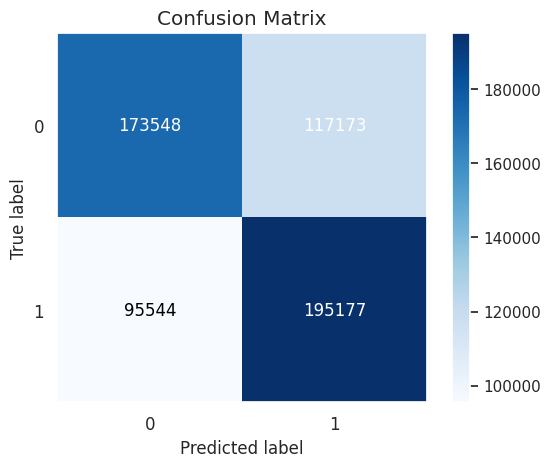

In [16]:
plot_confusion_matrix(train_ovs['target'],lr.predict(train_ovs[best]))

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

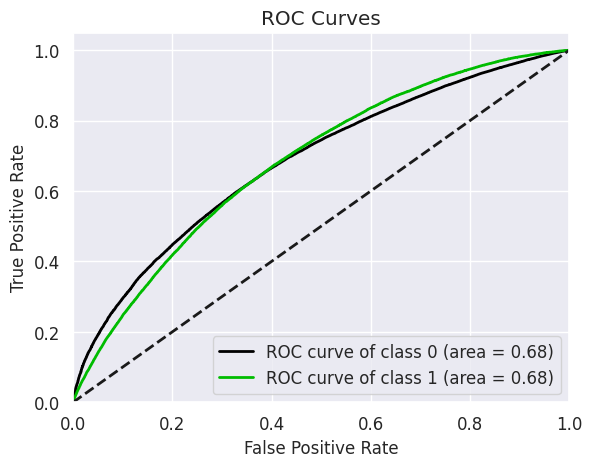

In [17]:
plot_roc_curve(train_ovs['target'],lr.predict_proba(train_ovs[best]),curves=('each_class'))

<Axes: title={'center': 'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

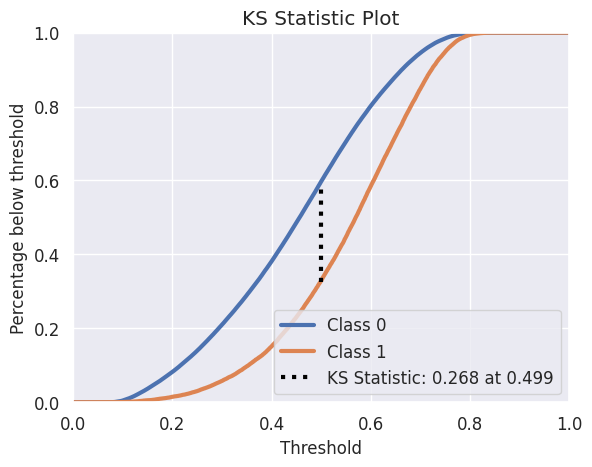

In [18]:
plot_ks_statistic(train_ovs['target'],lr.predict_proba(train_ovs[best]))

## Transformación WoE datos de prueba

In [19]:
test_woe=test.replace(mapa)
test_woe.head()

,id,term,grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,addr_state,initial_list_status,mths_since_last_delinq,mths_since_last_record,mths_since_last_major_derog,loan_amnt_3,funded_amnt_3,funded_amnt_inv_3,int_rate_3,installment_3,annual_inc_3,dti_3,open_acc_3,revol_bal_3,revol_util_3,total_acc_3,tot_cur_bal_3,total_rev_hi_lim_3,mths_between_issued_earliest_cr_3,collections_12_mths_ex_med_3,acc_now_delinq_3,tot_coll_amt_3,delinq_2yrs_3,inq_last_6mths_3,pub_rec_3,loan_amnt_5,funded_amnt_5,funded_amnt_inv_5,int_rate_5,installment_5,annual_inc_5,dti_5,open_acc_5,revol_bal_5,revol_util_5,total_acc_5,tot_cur_bal_5,total_rev_hi_lim_5,mths_between_issued_earliest_cr_5,collections_12_mths_ex_med_5,acc_now_delinq_5,tot_coll_amt_5,delinq_2yrs_5,inq_last_6mths_5,pub_rec_5,loan_amnt_7,funded_amnt_7,funded_amnt_inv_7,int_rate_7,installment_7,annual_inc_7,dti_7,open_acc_7,revol_bal_7,revol_util_7,total_acc_7,tot_cur_bal_7,total_rev_hi_lim_7,mths_between_issued_earliest_cr_7,collections_12_mths_ex_med_7,acc_now_delinq_7,tot_coll_amt_7,delinq_2yrs_7,inq_last_6mths_7,pub_rec_7,loan_amnt_9,funded_amnt_9,funded_amnt_inv_9,int_rate_9,installment_9,annual_inc_9,dti_9,open_acc_9,revol_bal_9,revol_util_9,total_acc_9,tot_cur_bal_9,total_rev_hi_lim_9,mths_between_issued_earliest_cr_9,collections_12_mths_ex_med_9,acc_now_delinq_9,tot_coll_amt_9,delinq_2yrs_9,inq_last_6mths_9,pub_rec_9,target
0,643778,0.135979,1.115631,0.098824,0.140725,0.056090,0.000042,-0.040423,-0.160712,-0.106289,-0.056629,-0.006394,-0.018463,0.016993,0.016365,0.024448,0.803143,-0.007215,-0.016408,0.196538,0.016547,-0.036191,0.203520,0.008456,-0.192910,-0.178672,0.196091,0.0,0.0,0.0,0.0,-0.185304,0.0,0.027123,0.028710,0.008283,1.078620,0.074143,-0.034636,0.128090,0.000080,-0.033966,0.256731,0.068868,-0.297194,-0.299946,0.123959,0.0,0.0,0.0,0.0,-0.061641,0.0,-0.008503,-0.028514,-0.014780,1.242684,0.041840,-0.034334,0.091489,0.017678,-0.037141,0.273826,0.068373,-0.199436,-0.198030,0.183355,0.0,0.0,0.0,-0.006378,-0.061641,0.0,-0.016283,-0.013445,-0.007890,1.406284,0.051245,-0.050728,0.139264,0.011787,-0.005904,0.298346,0.052691,-0.246125,-0.246392,0.200574,0.0,0.0,0.0,-0.006378,-0.061641,-0.011228,0
1,6166968,0.135979,0.372679,0.098824,0.140725,0.161334,0.000042,-0.040423,-0.004748,-0.106289,0.063448,-0.006394,-0.018463,0.016993,0.016365,0.019035,0.803143,-0.007215,0.293236,0.005017,-0.016386,0.081164,-0.005054,0.008456,0.291088,-0.178672,0.196091,0.0,0.0,0.0,0.0,-0.185304,0.0,0.027123,0.028710,0.008283,1.078620,0.074143,0.360566,0.003167,-0.016386,-0.017923,-0.095651,0.068868,0.097624,0.099208,0.123959,0.0,0.0,0.0,0.0,-0.339461,0.0,-0.008503,-0.028514,-0.014780,0.631316,0.041840,0.266673,-0.074548,-0.021919,-0.025329,-0.059973,0.068373,0.211579,-0.198030,0.183355,0.0,0.0,0.0,-0.006378,-0.339461,0.0,-0.016283,-0.013445,0.001845,0.837343,0.051245,0.307237,-0.065134,-0.017199,-0.027432,-0.062788,0.052691,0.120360,-0.246392,0.142685,0.0,0.0,0.0,-0.006378,-0.339461,-0.011228,0
2,20069833,0.135979,-0.396854,-0.033138,-0.155808,0.056090,0.000042,-0.040423,-0.057502,0.224335,-0.056629,-0.006394,0.027475,-0.056006,-0.053737,-0.042543,-0.528678,-0.061803,-0.246050,0.005017,0.016547,0.081164,-0.005054,0.008456,-0.050619,0.283652,0.196091,0.0,0.0,0.0,0.0,0.200854,0.0,-0.031376,-0.032437,-0.028369,-0.664254,-0.031664,-0.125222,0.003167,0.000080,-0.017923,-0.004351,0.005953,-0.052215,0.397880,0.123959,0.0,0.0,0.0,0.0,0.200854,0.0,-0.024787,-0.029455,-0.040559,-0.382634,-0.040591,-0.082809,-0.002860,-0.021919,0.025103,0.000603,-0.034386,-0.037656,0.197892,0.069828,0.0,0.0,0.0,-0.006378,0.200854,0.0,-0.137913,-0.142766,-0.117969,-0.528307,0.022578,-0.147734,0.000439,0.003816,0.080461,-0.005666,-0.047134,-0.043638,0.261268,0.142685,0.0,0.0,0.0,-0.006378,0.200854,-0.011228,0
3,8565675,-0.302039,-0.396854,0.098824,0.140725,-0.171171,0.000042,-0.040423,-0.048746,-0.106289,-0.011645,-0.006394,-0.018463,0.016993,0.016365,0.019035,-0.528678,-0.007215,0.293236,0.196538,0.016547,0.08116

## Desempeño del modelo en datos de entrenamiento

In [20]:
accuracy_score(test_woe['target'],lr.predict(test_woe[best]))

0.6044421886393206

In [21]:
test_woe.target.value_counts(normalize=True)

0    0.890697
1    0.109303
Name: target, dtype: float64

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

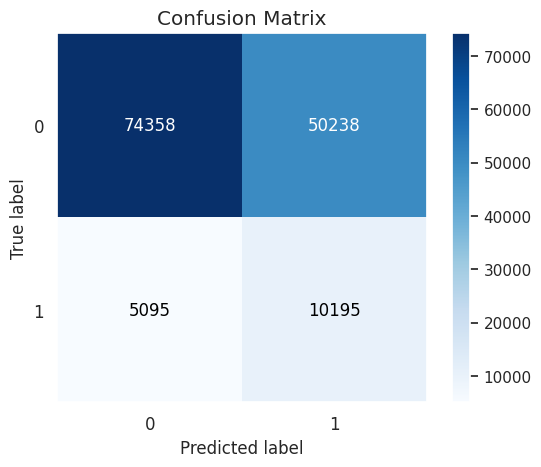

In [22]:
plot_confusion_matrix(test_woe['target'],lr.predict(test_woe[best]))

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

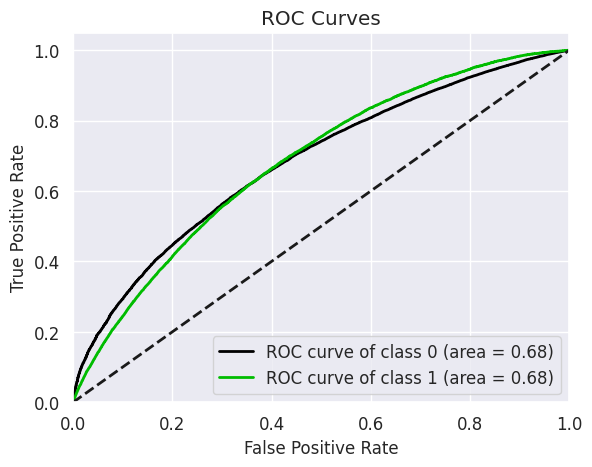

In [23]:
plot_roc_curve(test_woe['target'],lr.predict_proba(test_woe[best]),curves=('each_class'))

<Axes: title={'center': 'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

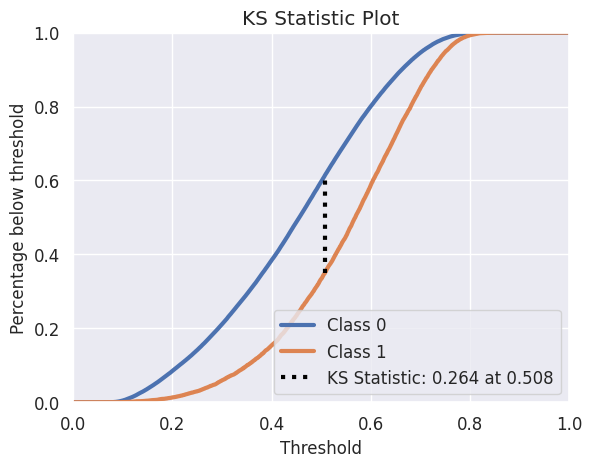

In [24]:
plot_ks_statistic(test_woe['target'],lr.predict_proba(test_woe[best]))